# Image Interpolation

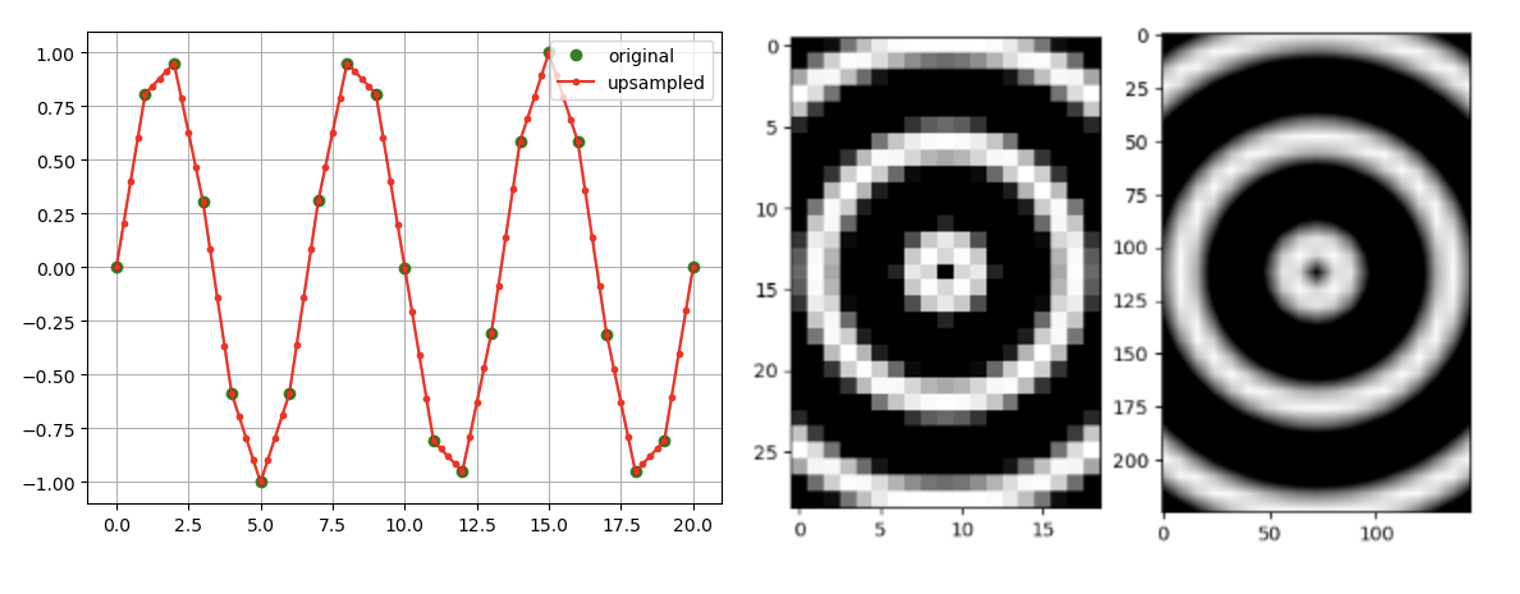

In this assignment you will write code to perform linear and bilinear interpolation.
This will allow you to uplsample and warp images.

---

A couple useful NumPy/Matplotlib functions for the assignment:

- **np.clip(x,lb,ub)** clip values in array **x** to live between a specified lower and upper bound
- **np.floor(x).astype(int)** round entries in **x** down and convert to integer type
- **np.meshgrid(xrange,yrange)** generate two 2D arrays containing the x and y coordinates for a uniform grid of points (e.g. pixel coordinates)
- **plt.subplots()** create a figure with multiple sub-plots

Please consult the documentation as needed:
- http://scipy-lectures.org/intro/numpy/array_object.html
- https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html



---

Please enter your name and SID here (click cell to edit)

**Name:** Arshiya Salehi

**SID:**  71713160

***

# 1. Linear Interpolation in 1D

To get started, let's first implement linear interpolation in 1D.  Assume we are given an 1D array describing samples of some curve **y=f(x)** so that **f[0],f[1],...f[N-1]** contain the values of **f(x)** at corresponding locations **x=0,1,2..N-1**. We want to use interpolation to estimate the value of **f** at some other (non-integer) locations **xnew**.  For example, we might choose **xnew=[0.0,0.5,1.0,1.5,..]** in order to fill in values which are halfway in between each of the given values.

NOTE: we could be even more general and consider inputs where **f** is specified at some arbitrary locations, but to keep things simple we will just assume that **x** is a uniform "grid" of integer locations (a common situation for image data).

### 1.1 Implementation [20 pts]
For each new location **xnew[i]**, find the two integer locations **x0,x1** that it falls between (**x0<=xnew[i]<=x1**). Since we know the value of **f** at those integer locations, we can use the linear interpolation formula we described in class to approximate **f(xnew[i])** by the weighted combination **values[i] = f[x0]\*(1-u) + f[x1]\*u** where **u=(xnew[i]-x0)**

The two "tricks" you need to figure out to complete the template below:

***(a) Do not use any loops or iterators***. You need to implement the above operations for all the values in **xnew** using array operations.

***(b) Boundary conditions***. For any **xnew[i]** which is out of bounds, i.e. <0 or >N-1, you should set the corresponding **values[i] = NaN**



In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def linear_interpolate(f, xnew):

    """
    This function takes a 1D array f containing values of some function
    f evaluated at a fixed grid of integer locations f(0), f(1), f(2)... f(N-1)
    and a set of other positions x and returns the interpolated 
    value at the given coordinates f(xnew[0]), f(xnew[1])....

    Parameters
    ----------
    f : 1D float array of shape N
    xnew : 1D float array of length M

    Returns
    -------
    values : 1D float array of length M containing
        interpolated values at coordinates specified by x.
        Any values outside the original range are set to np.NaN
        (i.e. values[k] = np.NaN if xnew[k]<0 or xnew[k]>N-1)
    
    """

    # clip xnew inside the range of f
    N = f.shape[0]   # size f
    M = xnew.shape[0]  # size M
    xc = np.clip(xnew,0,N-1)
   
    #compute the left and right integer index for each point xc
    x0 = np.floor(xc).astype(int)
    x1 = np.minimum(x0+1,N-1)
    
    # get the values of the neighbors
    fa = f[x0]
    fb = f[x1]
    
    # compute the interpolation parameter
    u = xc - x0
        
    # compute the weighted combination of neighbors
    values = fa*(1-u) + fb*u

    # mask the out of bounds locations by filling them with NaN
    outofbounds = (xnew<0) | (xnew>N-1)
    values[outofbounds] = np.nan
    
    return values

### 1.2 Testing [10 pts]

Here are some simple tests to make sure your code works.  Please fill in the expected target values and make sure your implementation passes them.

In [9]:
# run some tests.... since these are floating point values, we will
# check that results are within a small tolerance of the known 
# target answer using the assert_allclose function.  This comparison
# will also match NaN values between the result and target

# find a value halfway between 3 and 5
result = linear_interpolate(np.array([3,5]),np.array([0.5]))
target = np.array(4.0)
np.testing.assert_allclose(result,target)

# upsample from three values to five values
result = linear_interpolate(np.array([1,3,5]),np.array([0,0.5,1,1.5,2]))
target = np.array([1.0,2.0,3.0,4.0,5.0])
np.testing.assert_allclose(result,target)

# test that out of bounds points are filled with NaNs
result = linear_interpolate(np.array([100,0]),np.array([0,0.5,1,1.5,2]))
target = np.array([100.0,50.0,0.0,np.NaN,np.NaN])
np.testing.assert_allclose(result,target)

result = linear_interpolate(np.array([100,-100]),np.array([-1,-0.5,0,0.5,1]))
target = np.array([np.NaN,np.NaN,100.0,0.0,-100.0])
np.testing.assert_allclose(result,target)

print("All tests passed")

All tests passed


## 1.3 Visualization and Discussion [10 pts]

The code below shows an example of interpolating *sin* functions of different frequencies. Run the code and discuss the results in the cell below. 

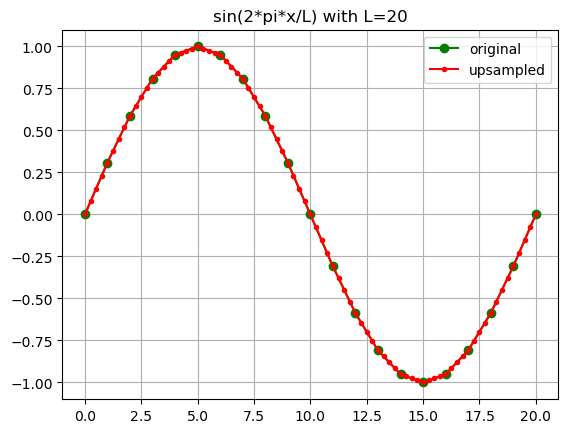

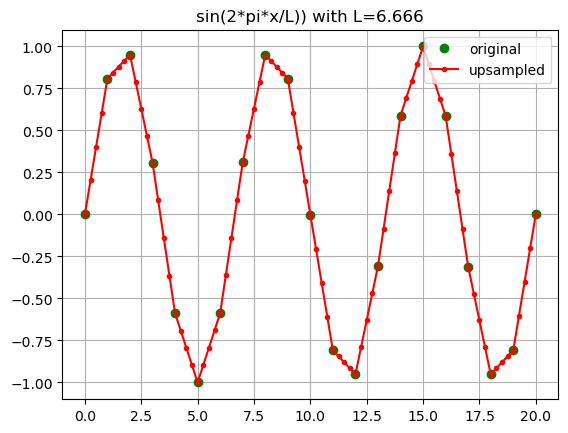

In [13]:
# show an example of interpolating a sin function
xorig = np.arange(0,21)
xup = np.arange(0,21,0.25)

L = 20
f = np.sin(2*np.pi*xorig/L)
fup = linear_interpolate(f,xup)
plt.plot(xorig,f,'go-')
plt.plot(xup,fup,'r.-')
plt.grid(True)
plt.legend(['original','upsampled'])
plt.title('sin(2*pi*x/L) with L=20')
plt.show()

L = 6.666
f3 = np.sin(2*np.pi*xorig / L)
f3up = linear_interpolate(f3,xup)
plt.plot(xorig,f3,'go')
plt.plot(xup,f3up,'r.-')
plt.grid(True)
plt.legend(['original','upsampled'])
plt.title('sin(2*pi*x/L)) with L=6.666')
plt.show()

### Discuss

(1) Describe the two plots briefly.  What is the relation in the wavelength L between the two plots? What is the frequency of the *sin* wave shown in the second plot?

[first plot shows the original sine wave f(x)=sin(2pix / L) witch L is 20 and it is maching the original plot and appears smothh due to having a long wavelength. The second plot represents the same sine wave function but with a shorter wavelength (L=6.666). The wave has a higher frequency, meaning more oscillations occur over the same range of x. The interpolation again accurately follows the original points. 
the relation is that lower wavelength have higher frequency.]

(2) How can we know if we have enough samples to accurately represent the input function f?

[it must satisfy the Nyquist-Shannon sampling theorem, which states that the sampling frequency must be at least twice the maximum frequency of the signal. sine wave f(x) = sin(2pix/L) maximum frequency is 1/L the sampling interval must satisfy deltax <= L/2]


***

# 2. Bilinear Interpolation in 2D 

Now we will implement bilinear interpolation.  The code will follow a similar pattern as the 1D case but now we need to find the 4 neighbors instead of just 2 and compute weights as combinations of the parameters u and v

### 2.1 Implementation [30 pts]

In [15]:
def bilinear_interpolate(image, x, y):

    """
    This function takes a 2D array of values (e.g. a grayscale
    image) and a set of coordinate points (x,y) and returns
    the interpolated value at the given coordinates.

    Parameters
    ----------
    image : 2D float array of shape HxW
         An array containing an image

    x : float array of length N
    y : float array of length N

    Returns
    -------
    values : float array of length N
        Interpolated values at coordinates (x,y)
        Any values for locations outside the original range are set to np.NaN
  
    """

    # clip x,y to be inside the image
    h, w= image.shape 
    outofbounds = (y<0) | (x<0) | (x>w-1) | (y > h-1)
    xc = np.clip(x,0,w-1)
    yc = np.clip(y,0,h-1)
    
    #compute the upper-left indices in
    #the grid for each point in (xc,yc)
    x0 = np.floor(xc).astype(int)
    y0 = np.floor(yc).astype(int)
    x1 = np.minimum(x0+1,w-1)
    y1 = np.minimum(y0+1,h-1)

    # get the brightness values of the 4 neighbors
    Ia = image[ y0, x0 ]
    Ib = image[ y1, x0 ]
    Ic = image[ y0, x1 ]
    Id = image[ y1, x1 ]

    # compute the parameters (u,v) and the 4 interpolation weights
    u = xc - x0
    v = yc - y0
    
    wa = (1 - u) * (1 - v)
    wb = (1 - u) * v
    wc = u * (1 - v)
    wd = u*v
    
    # compute the weighted combination of neighbors
    values = Ia*wa + Ib*wb + Ic*wc + Id*wd
    values[outofbounds] = np.NaN
    
    return values

### 2.2 Testing and Discussion [10 pts]

Below is some sample code which synthesizes an image and then upsamples it by a factor.  Run the code and answer the questions below.

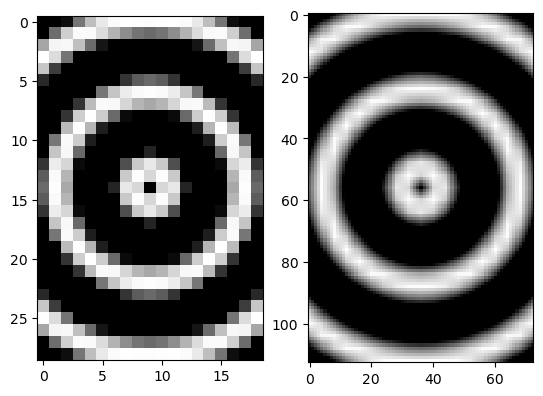

(29, 19)
(113, 73)


In [18]:
x,y = np.meshgrid(np.arange(-9,10),np.arange(-14,15))
image = np.sin(np.sqrt((x*x)+(y*y)))
ymax = image.shape[0]-1
xmax = image.shape[1]-1

s = 0.25
x,y = np.meshgrid(np.arange(0,xmax+s,s),np.arange(0,ymax+s,s))
imageup = bilinear_interpolate(image,x,y)

fig, ax = plt.subplots(1,2)
ax[0].imshow(image,cmap=plt.cm.gray,vmin=0,vmax=1)
ax[1].imshow(imageup,cmap=plt.cm.gray,vmin=0,vmax=1)
plt.show()
print(image.shape)
print(imageup.shape)


### Discussion

(1) Why do the coordintae in the displayed images both start at [0,0] even though one image has been scaled up?

[Even though one image is scaled up, its coordinates are relative to its own resolution. The scaling affects the resolution (the number of pixels in the image), but it doesn't change the origin or the alignment of the grid.]

(2) Why did we use upper limits of *xmax+s* and *ymax+s* in **arange** to generate x,y coordinates instead of just *image.shape*?

[Using xmax + s and ymax + s ensures that the grid includes the last coordinate values of the original image when generating the scaled-up version. ]


### 2.3 Color image transformations [20 pts]

Load in a small color image of your choice and print out the dimensions of that image.
As in the last assignment, don't forget to convert to floats and scale as necessary so that values are in the interval [0,1]

Generate and display in the notebook the following transformed versions of the image you loaded:

- The image upsampled by a factor of 2 (twice the resolution)
- The image where the vertical axis is stretched by a factor of 2 but horizontal resolution remains the same
- The image translated to the right by 100 pixels

For each of these results *also print out the dimensions of the resulting image*.

A couple details you will need take care of in your code:
- For a color image there are 3 channels so you need to apply your interpolation function to each channel and then combine the results
- Your interpolation function returns NaN values where the values are unknown (out of bounds). You should convert these entries to 0s before displaying the result (so the background is black)



I.shape= (290, 500, 3) 
I.dtype= uint8


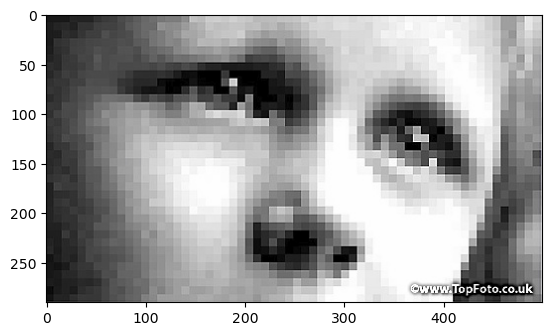

Upsampled dimensions: (580, 1000, 3)


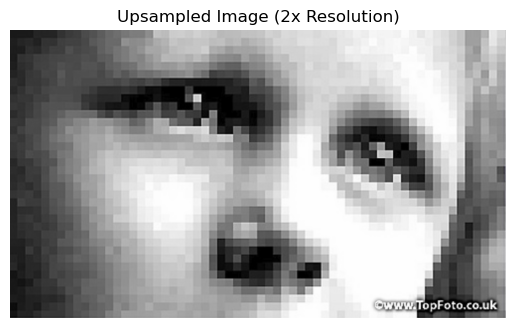

In [20]:
### load in a color image
import numpy as np
import matplotlib.pyplot as plt

#load an image
I = plt.imread('photo2.jpg')

#display the shape of the array and data type
print("I.shape=",I.shape,"\nI.dtype=",I.dtype)

#convert to float data type and scale to [0..1] if necessary
if (I.dtype == np.uint8):
    I = I.astype(float) / 256
    
#display the image in the notebook using a grayscale colormap
plt.imshow(I,cmap=plt.cm.gray)

#force matplotlib to go ahead and display the plot now
plt.show()

# interpolate a new color image at 2x resolution
scaleFactor=2
outPutHeight= I.shape[0]*scaleFactor
outPutWidth= I.shape[1]*scaleFactor
upsampledImage = np.zeros((outPutHeight, outPutWidth, I.shape[2]), dtype=I.dtype)

x_coords = np.linspace(0, I.shape[1] - 1, outPutWidth)
y_coords = np.linspace(0, I.shape[0] - 1, outPutHeight)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

# Perform bilinear interpolation for each color channel
red_grid = bilinear_interpolate(I[:, :, 0], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, outPutWidth)
green_grid = bilinear_interpolate(I[:, :, 1], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, outPutWidth)
blue_grid = bilinear_interpolate(I[:, :, 2], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, outPutWidth)

# Combine the grids into a single upsampled image
upsampled_image = np.stack((red_grid, green_grid, blue_grid), axis=-1)

print("Upsampled dimensions:", upsampled_image.shape)


# display new image
plt.imshow(upsampled_image)
plt.title("Upsampled Image (2x Resolution)")
plt.axis('off')
plt.show()


Upsampled dimensions: (580, 500, 3)


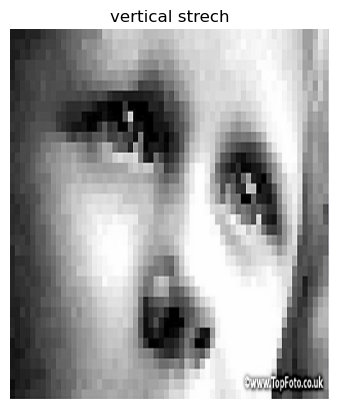

In [22]:
# interpolate and display a new color image stretched vertical
scaleFactor=2
outPutHeight= I.shape[0]*scaleFactor
width=I.shape[1]
upsampledImage = np.zeros((outPutHeight, width, I.shape[2]), dtype=I.dtype)

x_coords = np.linspace(0, I.shape[1] - 1, width)
y_coords = np.linspace(0, I.shape[0] - 1, outPutHeight)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

# Perform bilinear interpolation for each color channel
red_grid = bilinear_interpolate(I[:, :, 0], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, width)
green_grid = bilinear_interpolate(I[:, :, 1], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, width)
blue_grid = bilinear_interpolate(I[:, :, 2], x_grid.ravel(), y_grid.ravel()).reshape(outPutHeight, width)

# Combine the grids into a single upsampled image
upsampled_image = np.stack((red_grid, green_grid, blue_grid), axis=-1)

print("Upsampled dimensions:", upsampled_image.shape)


# display new image
plt.imshow(upsampled_image)
plt.title("vertical strech")
plt.axis('off')
plt.show()


Upsampled dimensions: (290, 600, 3)


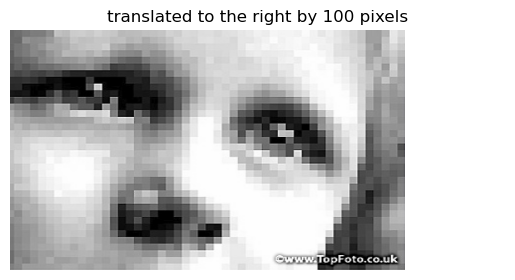

In [24]:
# interpolate and display a new color image translated horizontally
# interpolate and display a new color image stretched horizontally
translation_x = 100

height= I.shape[0]
OutPutWidth=I.shape[1]+translation_x
upsampledImage = np.zeros((outPutHeight, width, I.shape[2]), dtype=I.dtype)

x_coords = np.linspace(0, I.shape[1] - 1 , OutPutWidth)
y_coords = np.linspace(0, I.shape[0] - 1, height)
x_grid, y_grid = np.meshgrid(x_coords, y_coords)

translated_x_grid = x_grid + translation_x

red_grid = bilinear_interpolate(I[:, :, 0], translated_x_grid.ravel(), y_grid.ravel()).reshape(height, OutPutWidth)
green_grid = bilinear_interpolate(I[:, :, 1], translated_x_grid.ravel(), y_grid.ravel()).reshape(height, OutPutWidth)
blue_grid = bilinear_interpolate(I[:, :, 2], translated_x_grid.ravel(), y_grid.ravel()).reshape(height, OutPutWidth)

# Combine the grids into a single upsampled image
upsampled_image = np.stack((red_grid, green_grid, blue_grid), axis=-1)

print("Upsampled dimensions:", upsampled_image.shape)


# display new image
plt.imshow(upsampled_image)
plt.title("translated to the right by 100 pixels")
plt.axis('off')
plt.show()
